In [2]:
Khai báo thư viện

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

Khai báo nhãn để kiểm tra sau khi train

In [3]:
labels = ['bananas','blueberries','grapes','guava','oranges','pears','pineapples','raspberries','strawberries','watermelons']

Load data từ file ảnh

In [109]:
N = 30
namefruit = ['bananas','blueberries','grapes','guava','oranges','pears','pineapples','raspberries','strawberries','watermelons']
Img_data = np.zeros((N*10,32,32,3), dtype=np.float32)
#Chuyển ảnh thành mảng
for name in range(0,10):
  for i in range(0,N): 
    img = cv2.imread(namefruit[name]+str(i)+'.jpg',cv2.IMREAD_COLOR)
    Img_data[name*30+i][::][::][::] = img

Tạo nhãn để train

In [102]:
Name = np.zeros((N*10), dtype=np.float32)
for i in range(0,10):
  for j in range(0,N):
    Name[i*N+j] = i

In [ ]:
Chia dữ liệu để train và test

In [115]:
x_train,x_test,y_train,y_test = train_test_split(Img_data,Name,test_size=0.2)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255.0
x_test/=255.0
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

Khai báo các lớp

In [213]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_141 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_142 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_104 (MaxPooli  (None, 8, 8, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_143 (Conv2D)         (None, 8, 8, 128)       

Cấu hình train

In [214]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 4, epochs = 50,verbose = 1, validation_data =(x_test,y_test))

Epoch 1/50
60/60 [==============================] - 1s 7ms/step - loss: 2.3239 - accuracy: 0.1625 - val_loss: 2.0982 - val_accuracy: 0.2333
Epoch 2/50
60/60 [==============================] - 0s 5ms/step - loss: 1.8547 - accuracy: 0.3042 - val_loss: 1.9054 - val_accuracy: 0.2833
Epoch 3/50
60/60 [==============================] - 0s 5ms/step - loss: 1.6299 - accuracy: 0.3792 - val_loss: 1.7566 - val_accuracy: 0.2500
Epoch 4/50
60/60 [==============================] - 0s 5ms/step - loss: 1.4552 - accuracy: 0.4208 - val_loss: 1.5808 - val_accuracy: 0.4000
Epoch 5/50
60/60 [==============================] - 0s 5ms/step - loss: 1.3433 - accuracy: 0.4458 - val_loss: 1.3603 - val_accuracy: 0.4333
Epoch 6/50
60/60 [==============================] - 0s 5ms/step - loss: 1.1617 - accuracy: 0.5167 - val_loss: 1.7022 - val_accuracy: 0.3000
Epoch 7/50
60/60 [==============================] - 0s 5ms/step - loss: 1.1696 - accuracy: 0.5167 - val_loss: 1.0927 - val_accuracy: 0.5500
Epoch 8/50
60/60 [==

Test kết quả với data test sau khi train

bananas


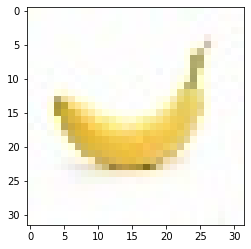

In [215]:
name_img = 'bananas_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

blueberries


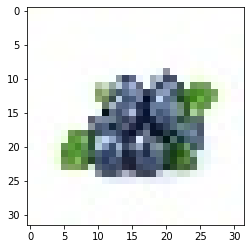

In [216]:
name_img = 'blueberries_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

grapes


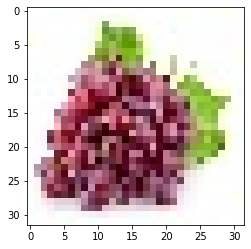

In [217]:
name_img = 'grapes_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

guava


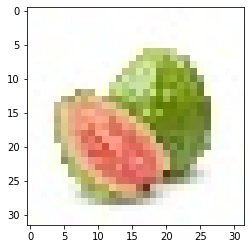

In [218]:
name_img = 'guava_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

oranges


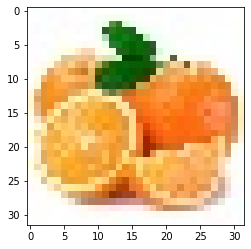

In [219]:
name_img = 'oranges_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

pears


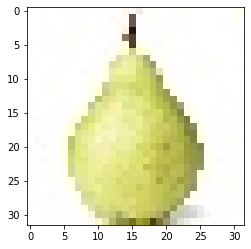

In [220]:
name_img = 'pears_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

pineapples


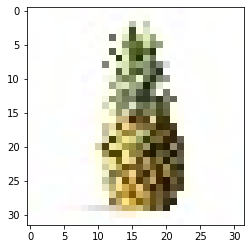

In [221]:
name_img = 'pineapples_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

raspberries


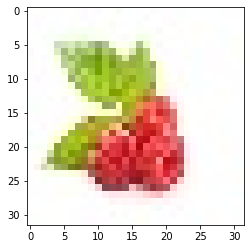

In [222]:
name_img = 'raspberries_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

strawberries


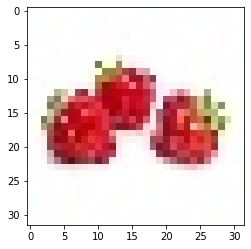

In [223]:
name_img = 'strawberries_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

watermelons


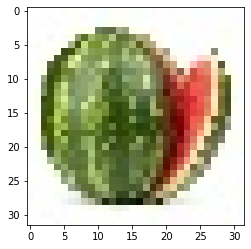

In [224]:
name_img = 'watermelons_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

In [225]:
model.save('Fruit.h5')